Exploring the dataset which contains the images

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

In [2]:
data_dir = 'vehicle-type-recognition/Dataset'
!ls {data_dir}

Bus  Car  Truck  motorcycle


In [3]:
def load_metadata(dir_path):
    
    rows = []
    for dir_path, dir_name, file_list in os.walk(dir_path):
        for file in file_list:
            file_path = os.path.join(dir_path, file)
            label = os.path.split(dir_path)[-1]
            rows.append([file_path, label])
            
    return pd.DataFrame(rows, columns=['image_path', 'class'])

In [4]:
img_df = load_metadata(data_dir)
print("number of images present in the dataset:", img_df.shape[0])
print("number of classes:", len(img_df['class'].unique()))

number of images present in the dataset: 400
number of classes: 4


<Axes: title={'center': 'distribution of classes in the dataset'}, xlabel='class'>

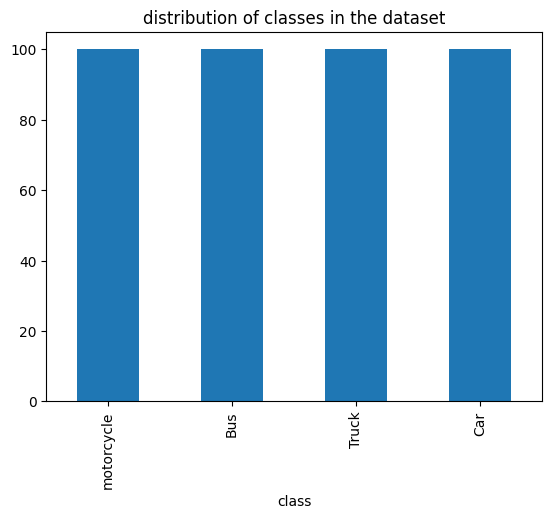

In [5]:
img_df['class'].value_counts().plot(kind="bar", 
        title="distribution of classes in the dataset")

- All four classes are equally distributed.

In [6]:
img_nd_labels = img_df.values
img_nd_labels[0]

array(['/kaggle/input/vehicle-type-recognition/Dataset/motorcycle/Image_22.jpg',
       'motorcycle'], dtype=object)

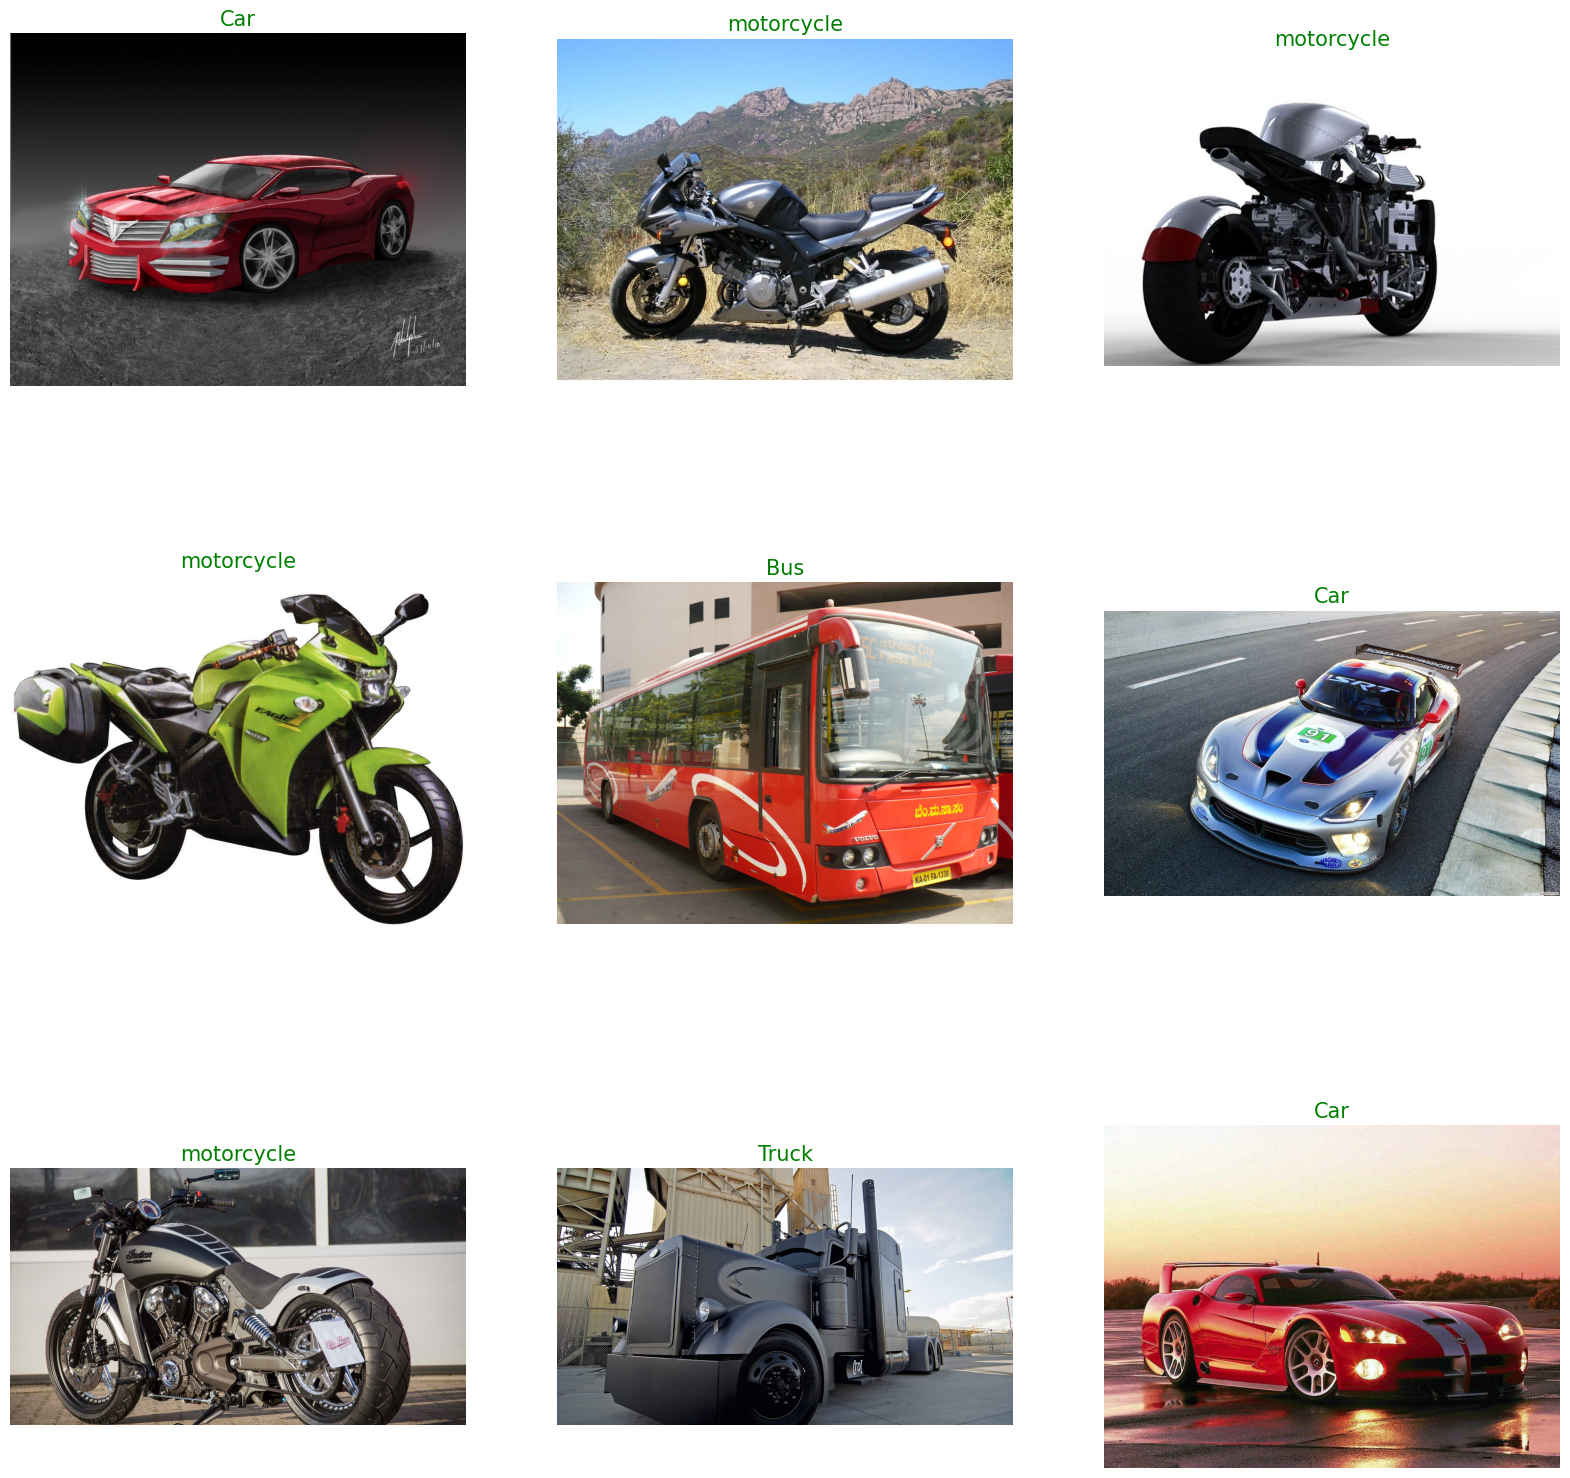

In [7]:
sample_img_paths, sample_labels = zip(*img_df.sample(9, random_state=321).values.tolist())

plt.figure(figsize= (20, 20))
for i in range(9):
    # create a subplot grid
    plt.subplot(3, 3, i + 1)
    image = plt.imread(sample_img_paths[i])
    image = image/255
    plt.imshow(image)
    # get name of class/label
    class_name = sample_labels[i]   
    plt.title(class_name, fontsize= 15, color= 'green')
    plt.axis('off')
    
plt.show()